In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px

from sklearn.model_selection import train_test_split #Parte la base de datos (80-20)
from imblearn.over_sampling import SMOTE #Para balancear una base de datos, uno de los metodos para crear datos con los que ya evisten es SMOTE (Synthetico Oversampling algo Technique)

from sklearn.linear_model import LogisticRegression #Ajusta los datos a una curva logísdtica y toma decisiones sobre eso. 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc



from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report #Para incluir la curva de ROC


In [7]:
df = pd.read_csv('BDUA.csv')
df.head()

,Género,Grupo etario,Código de la entidad,Nombre de la entidad,Régimen,Tipo de afiliado,Estado del afiliado,Condición del beneficiario,Zona de Afiliación,Departamento,Municipio,tps_nvl_ssb_id,Nivel del Sisbén,Cantidad de registros
0,Masculino,19 a 45,ESSC62,ASMET SALUD EPS S.A.S. -CM,Contributivo,COTIZANTE,Activo,NO APLICA,Rural,CAUCA,PURACE,N,COMUNIDADES INDÍGENAS,1
1,Femenino,50 a 55,EPS017,EPS FAMISANAR S.A.S.,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,TOLIMA,ESPINAL,NaN,NaN,65
2,Femenino,5 a 15,ESSC24,COOSALUD EPS S.A. -CM,Contributivo,BENEFICIARIO,Activo,NO APLICA,Urbana,ANTIOQUIA,AMALFI,NaN,NaN,11
3,Femenino,15 a 19,EPS005,ENTIDAD PROMOTORA DE SALUD SANITAS S.A.S.,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,CAUCA,PIENDAMO,NaN,NaN,4
4,Masculino,70 a 75,EPS017,EPS FAMISANAR S.A.S.,Contributivo,BENEFICIARIO,Activo,NO APLICA,Urbana,CUNDINAMARCA,TOCANCIPA,NaN,NaN,9


<br></br>
*Para ver los valores que hay en cada columna*

In [9]:
valores_col = {}

for column in df.columns:
    valores_col[column] = list(set(df[column]))

for column, valores in valores_col.items():
    print(f"Valores únicos en la columna '{column}':")
    print(valores)
    print()

Valores únicos en la columna 'Género':
['Femenino', 'Masculino']

Valores únicos en la columna 'Grupo etario':
['70 a 75', '1 a 5', '45 a 50', '50 a 55', '65 a 70', '55 a 60', '5 a 15', '15 a 19', '19 a 45', '> 75', '60 a 65', '< 1']

Valores únicos en la columna 'Código de la entidad':
['EPSIC3', 'ESSC18', 'ESSC07', 'EPS048', 'EPS047', 'EPSIC1', 'EAS016', 'EPS005', 'ESSC62', 'EPS046', 'EPSIC4', 'EPS040', 'EPS037', 'CCFC50', 'EPS018', 'EPS042', 'EAS027', 'EPS012', 'EPS041', 'EPSIC5', 'EPS001', 'CCFC55', 'CCFC33', 'ESSC24', 'EPSIC6', 'EPS008', 'EPS010', 'EPS017', 'EPSC34', 'CCFC20', 'EPS002', 'EPSC25']

Valores únicos en la columna 'Nombre de la entidad':
['CAPRESOCA E.P.S. -CM', 'FONDO PASIVO SOCIAL DE LOS FERROCARRILES NACIONALES', 'CAJA DE COMPENSACIÓN FAMILIAR DEL ORIENTE COLOMBIANO "COMFAORIENTE" -CM', 'CAJACOPI EPS S.A.S -CM', 'ENTIDAD PROMOTORA DE SALUD SERVICIO OCCIDENTAL DE SALUD S.A. S.O.S.', 'ENTIDAD PROMOTORA DE SALUD MALLAMAS EPSI -CM', 'COOSALUD EPS S.A.', 'EPS FAMILIAR DE

<br></br>
*Para revisar si estas columnas significan lo mismo*

In [23]:
num_unicos_COD = len(valores_col['Código de la entidad'])
num_unicos_NOM = len(valores_col['Nombre de la entidad'])
print(f'el número de valores únicos que tiene el código es {num_unicos_COD} y los de el nombre son {num_unicos_NOM}. Es decir son lo mismo')

el número de valores únicos que tiene el código es 32 y los de el nombre son 32. Es decir son lo mismo


<br></br>
*Para conocer la naturaleza de los datos*

In [172]:
print(df.shape)
print( )
print(df.info())

(305247, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305247 entries, 0 to 305246
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Género                      305247 non-null  object
 1   Grupo etario                305247 non-null  object
 2   Código de la entidad        305247 non-null  object
 3   Nombre de la entidad        305247 non-null  object
 4   Régimen                     305247 non-null  object
 5   Tipo de afiliado            305247 non-null  object
 6   Estado del afiliado         305247 non-null  object
 7   Condición del beneficiario  305247 non-null  object
 8   Zona de Afiliación          305247 non-null  object
 9   Departamento                305247 non-null  object
 10  Municipio                   305247 non-null  object
 11  tps_nvl_ssb_id              41840 non-null   object
 12  Nivel del Sisbén            41840 non-null   object
 13  Cantidad de reg

<br></br>
*Ver la distribución de nulos*

In [27]:
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100
print(porcentaje_nulos)

Género                         0.000000
Grupo etario                   0.000000
Código de la entidad           0.000000
Nombre de la entidad           0.000000
Régimen                        0.000000
Tipo de afiliado               0.000000
Estado del afiliado            0.000000
Condición del beneficiario     0.000000
Zona de Afiliación             0.000000
Departamento                   0.000000
Municipio                      0.000000
tps_nvl_ssb_id                86.293068
Nivel del Sisbén              86.293068
Cantidad de registros          0.000000
dtype: float64


<br></br>
*Para ver cuántos tienen EPS Sura*

In [158]:
def extract_column_by_index(csv_file, column_index):
    df = pd.read_csv(csv_file)
    column_data = df.iloc[:, column_index].tolist()
    return column_data
lista_EPS = extract_column_by_index('BDUA.csv', 3)

afiliados_SURA = lista_EPS.count('EPS SURAMERICANA S.A.')
afiliados_total = len(lista_EPS)
porcentaje_SURA = ((afiliados_SURA/afiliados_total)*100)
print(f'Los afiliados de SURA son el {porcentaje_SURA}%, es decir {afiliados_SURA} afiliados')



Los afiliados de SURA son el 3.627554079155569%, es decir 11073 afiliados


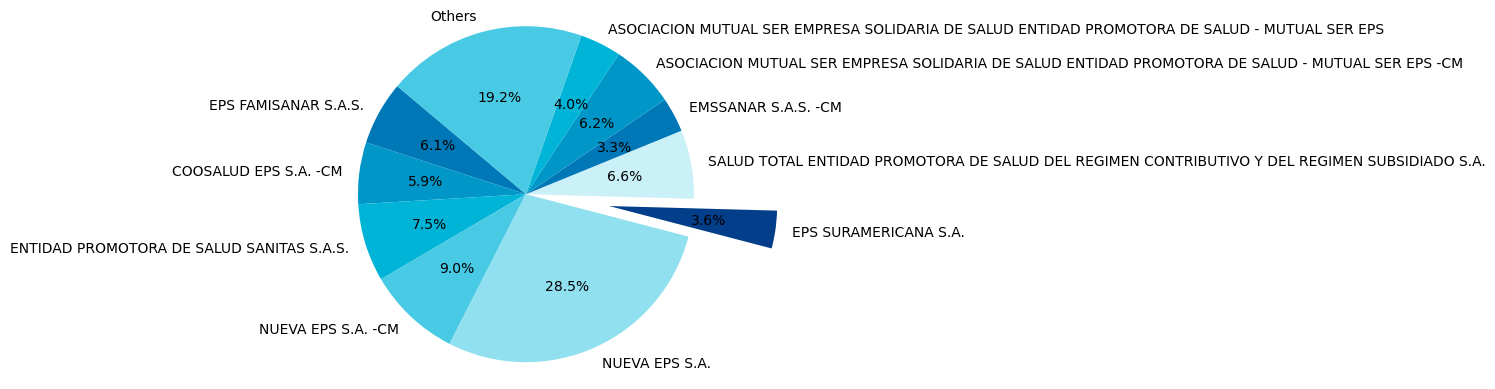

In [156]:
from collections import Counter
data = lista_EPS

counter = Counter(data)

total = sum(counter.values())
percentages = {key: (count / total) * 100 for key, count in counter.items()}

threshold = 3
others_percentage = 0
others_count = 0
to_remove = []
for key, percentage in percentages.items():
    if percentage < threshold:
        others_count += counter[key]
        to_remove.append(key)
others_percentage = (others_count / total) * 100
for key in to_remove:
    del percentages[key]


percentages["Others"] = others_percentage

explode = [0] * len(percentages)
if "EPS SURAMERICANA S.A." in percentages:
    explode[list(percentages.keys()).index("EPS SURAMERICANA S.A.")] = 0.5
    
colors = ['#0077b6', '#0096c7', '#00b4d8',   '#48cae4', '#90e0ef', '#ade8f4', '#caf0f8' ]
colors[list(percentages.keys()).index("EPS SURAMERICANA S.A.")] = '#023e8a'


labels = percentages.keys()
sizes = percentages.values()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, colors=colors)
plt.axis('equal')
plt.show()


Como este dataset tiene en su mayoría datos de tipo *objeto*, no es posible calcular estadísticas descriptivas, diagramas de correlación, etc, sin antes hacer un preprocesamiento para codificar dichos valores. En este orden de ideas se hará un preprocesamiento y luego una segunda etapa de exploración. 

<br></br>
*Otras Estadísticas Descriptivas*

In [189]:
df.describe()

,Cantidad de registros
count,305247.000000
mean,75.142442
std,1573.890027
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,291856.000000


In [183]:
df.describe(include=['object'])

,Género,Grupo etario,Código de la entidad,Nombre de la entidad,Régimen,Tipo de afiliado,Estado del afiliado,Condición del beneficiario,Zona de Afiliación,Departamento,Municipio,tps_nvl_ssb_id,Nivel del Sisbén
count,305247,305247,305247,305247,305247,305247,305247,305247,305247,305247,305247,41840,41840
unique,2,12,32,32,1,3,2,3,2,33,1036,3,18
top,Masculino,19 a 45,EPS037,NUEVA EPS S.A.,Contributivo,BENEFICIARIO,Activo,NO APLICA,Urbana,ANTIOQUIA,SANTIAGO DE CALI,1,POBLACIÓN CON SISBEN
freq,153264,60894,86843,86843,305247,151744,268568,284671,197058,36110,2885,18981,29353
